# Red Wine Qualite Dataset:

Vamos a usar el dataset que se encuentra en:

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

Que se usa para construir modelos que predigan si un determinado vino es de buena calidad o no.

Importamos las librerías

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Leemos los datos

In [3]:
df = pd.read_csv('winequality-red.csv', delimiter=";")

# Preparación de datos

Problemas con los que nos podemos encontrar:

>

1.   Valores Nan
2.   Valores categóricos

## Comprensión y visualización de datos

A partir de la información subministrada por ***df.info()***: ¿Qué variables deben ser modificadas? ¿Porque razón? ¿ Qué métodos podemos emplear?



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Si queremos ver únicamente los primeros valores que hay en una base de datos ejecutamos:
df.head()
# Recordemos la importancia de visualizar la tabla, para poder ver de una manera clara como está estructurada la información

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# El atributo objetivo es quality
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
# ¿Cuántas filas y columnas tiene nuestra base de datos?
print("Filas, columnas: " + str(df.shape))

Filas, columnas: (1599, 12)


## Limpieza de datos

En principio los datos a simple vista parecen que están correctos. Aquí habría que explorar las distintas variables como ya hemos visto.

In [ ]:
#Vamos a ver si hay valores nulos
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Transformaciones

## Discretización de datos y creación de atributos

<Axes: xlabel='quality', ylabel='count'>

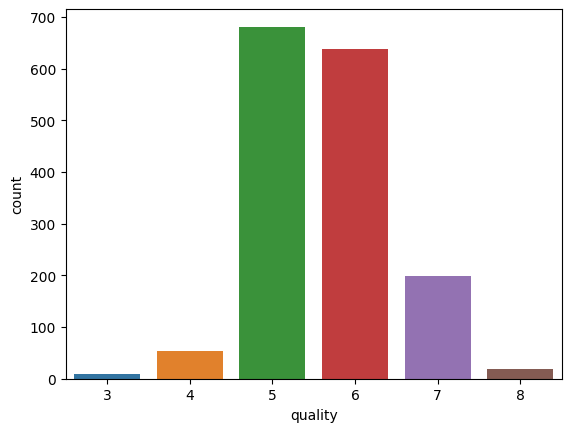

In [4]:
sns.countplot(x='quality', data=df)

In [5]:
# Vamos a considerar que los vinos con valores 1, 2 y 3 son malos (valor 1),
# con valores 4, 5, y 6 tienen una calidad media (valor 2),
# con valores 7 y 8 son buenos (valor 3) y aquellos con 9 y 10 son excelentes (valor 4)
df['calidad'] = df['quality']
df.loc[df['quality'] <= 3, 'calidad'] = 1
df.loc[(df['quality'] >= 4) & (df['quality'] <= 6), 'calidad'] = 2
df.loc[(df['quality'] >= 7) & (df['quality'] <= 8), 'calidad'] = 3
df.loc[(df['quality'] >= 9), 'calidad'] = 4

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'calidad'],
      dtype='object')

In [ ]:
df['calidad'].unique()

array([2, 3, 1])

In [ ]:
df['calidad'].value_counts()

2    1372
3     217
1      10
Name: calidad, dtype: int64

##Normalización de datos

<Axes: xlabel='quality', ylabel='fixed acidity'>

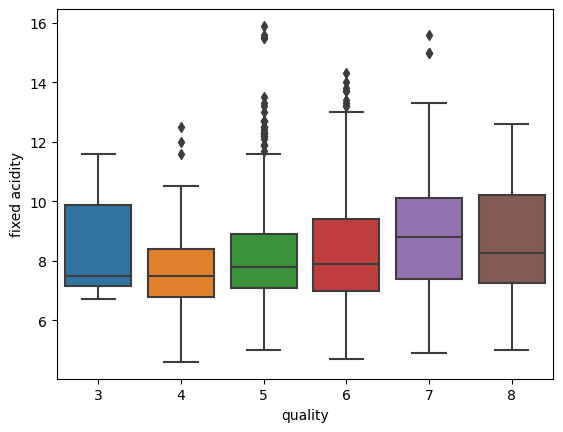

In [6]:
# Para buscar Outliers
# Como la variable objetivo es quality, vamos a ver la relación entre dicha variable y el resto
sns.boxplot(x='quality', y='fixed acidity', data = df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

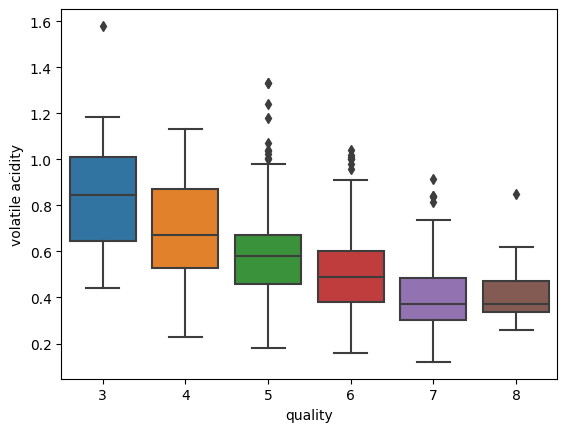

In [12]:
sns.boxplot(x='quality', y='volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

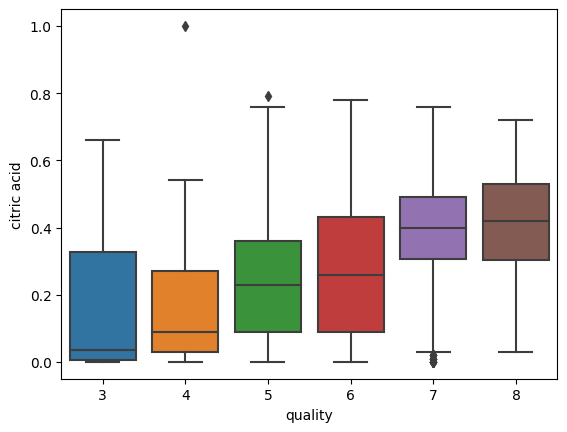

In [11]:
sns.boxplot(x='quality', y='citric acid', data = df)

<Axes: xlabel='quality', ylabel='residual sugar'>

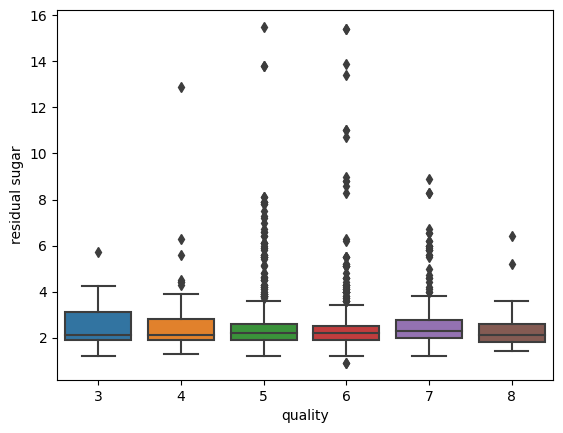

In [10]:
sns.boxplot(x='quality', y='residual sugar', data = df)

<Axes: xlabel='quality', ylabel='chlorides'>

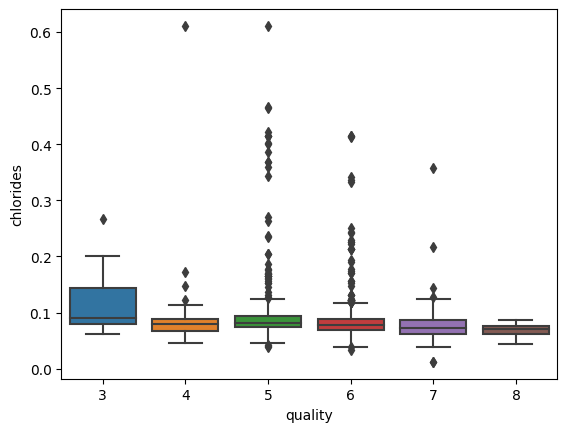

In [9]:
sns.boxplot(x='quality', y='chlorides', data = df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

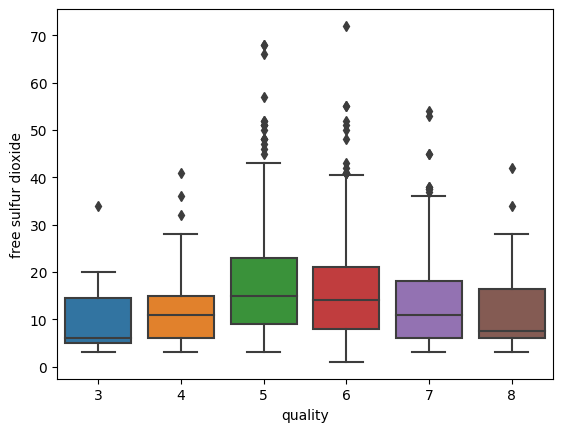

In [8]:
sns.boxplot(x='quality', y='free sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

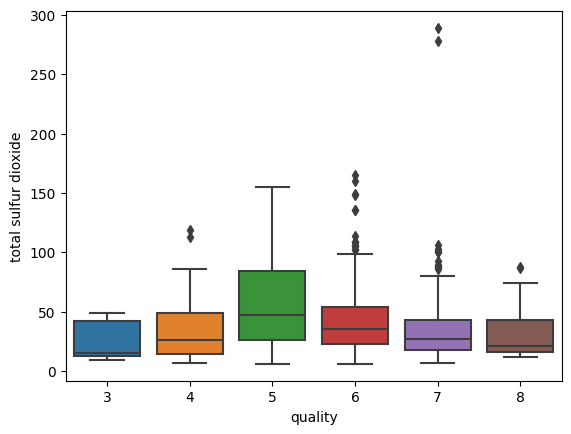

In [7]:
sns.boxplot(x='quality', y='total sulfur dioxide', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


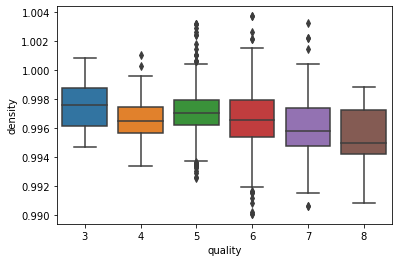

In [ ]:
sns.boxplot(x='quality', y='density', data = df)

<Axes: xlabel='quality', ylabel='pH'>

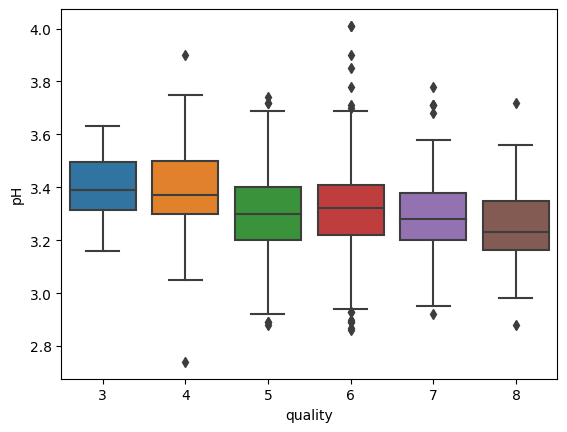

In [14]:
sns.boxplot(x='quality', y='pH', data = df)

<Axes: xlabel='quality', ylabel='sulphates'>

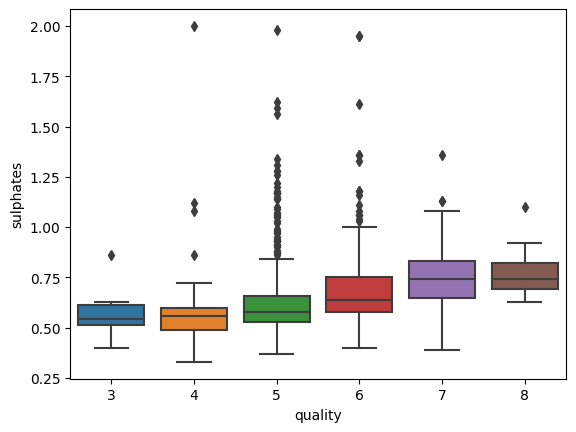

In [13]:
sns.boxplot(x='quality', y='sulphates', data = df)

<Axes: xlabel='quality', ylabel='alcohol'>

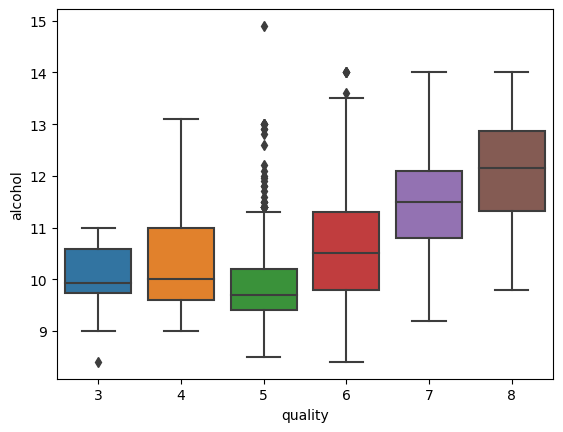

In [16]:
sns.boxplot(x='quality', y='alcohol', data = df)

Se ve que hay bastantes outliers en algunas columnas. Vamos a seguir mirando

In [ ]:
# Estadísticas
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


¿Qué vemos?

*   'fixed acidiy', 'volatile acidity': apenas hay diferencia entre el 25% y el 50% -> distribución no uniforme que puede explicar el gran número de outliers
*   'citric acid': si que parece que está uniformemente distribuido.
*   'residual sugar': min -> 0.9, max -> 15. Demasiada diferencia que también puede explicar el gran número de outliers
*   'chlorides', 'free sulfur dioxide', 'total suflur dioxide': misma expliación.

In [17]:
# Vamos a normalizar por la diferencia, que intenta compensar el efecto de la distancia del valor que tratamos con respecto al máximo de los valores
def normalize (wine):
  result = wine.copy()

  for feature_name in wine.columns:
    max_value = wine[feature_name].max()
    min_value = wine[feature_name].min()
    result[feature_name] = (wine[feature_name] - min_value) / (max_value - min_value)
  return result

red = normalize(df)

red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,calidad
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,0.5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,0.5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,0.5
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.5


In [18]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205,0.564728
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514,0.176977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000,0.500000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000,0.500000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Normalizando los datos hemos conseguido igualar el rango de los mismos.

1.   Elemento de lista
2.   Elemento de lista

